In [1]:
import pyLIMA, os, sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pyLIMA import event, telescopes
from pyLIMA.simulations import simulator
from pyLIMA.models import FSPL_model,USBL_model,PSPL_model
from ipywidgets import interactive, HBox, VBox, Layout
from ipywidgets import (FloatSlider, FloatLogSlider, interactive_output, HBox, VBox, GridBox, Layout, Label)
from IPython.display import display
current_path = os.getcwd()
parent_directory = os.path.abspath(os.path.join(current_path, os.pardir))
print("Parent Directory:", parent_directory)
sys.path.append(parent_directory)
import pyLIMA_plots
from astropy import units as u
from astropy import constants as C
from pyLIMA.xallarap.xallarap import xallarap_shifts, compute_xallarap_curvature

import numpy as np
import pandas as pd
import astropy.units as u

Parent Directory: /home/anibal/binary_source


In [2]:
def orbital_period_kepler(a_au, M_tot_Msun):
    """
    Compute the orbital period of a binary system using Kepler's third law
    in astronomical units.

    Parameters
    ----------
    a_au : float or array-like
        Semimajor axis in astronomical units (AU).
    M_tot_Msun : float or array-like
        Total mass of the system in solar masses (M_sun).

    Returns
    -------
    P_yr : float or ndarray
        Orbital period in years.
    """
    a_au = np.asarray(a_au, dtype=float)
    M_tot_Msun = np.asarray(M_tot_Msun, dtype=float)
    print("Period ", np.sqrt(a_au**3 / M_tot_Msun), "years")
    print("converting to ", np.sqrt(a_au**3 / M_tot_Msun)*365.25, "days (to use in pyLIMA)")
    return np.sqrt(a_au**3 / M_tot_Msun)*365.25*(1/u.day)

In [3]:


def build_case(case_name, DS, DL, rEhat, v_perp, a, M1, M2,
               t0=50, u0=0.1, xi_phase=0, xi_inclination=np.pi/2, flux_ratio=0.2):
    """
    Construye un diccionario con los parámetros de un caso de xallarap.
    """
    q_xi = (M2 / M1).decompose().value
    P = orbital_period_kepler(a, M1 + M2)

    # tE = (rEhat * DL / DS) / v_perp
    tE = (rEhat) / v_perp
    return {
        "case": case_name,
        "DS_kpc": DS.to(u.kpc).value,
        "DL_kpc": DL.to(u.kpc).value,
        "rEhat_AU": rEhat.to(u.AU).value,
        "v_perp_kms": v_perp.to(u.km/u.s).value,
        "a_AU": a.to(u.AU).value,
        "M1_Msun": M1.to(u.M_sun).value,
        "M2_Msun": M2.to(u.M_sun).value,
        "xi_mass_ratio": q_xi,
        "tE": tE.to(u.day).value,
        "t0": t0,
        "u0": u0,
        "xiE": (a / rEhat).decompose().value,
        "omega_xi_1_per_day": (2*np.pi / P).value,
        "xi_phase": xi_phase,
        "xi_inclination": xi_inclination,
        "flux_ratio": flux_ratio,
        "P": P.value,
    }

DS = 8 * u.kpc
DL = 4 * u.kpc
v_perp = 50 * u.km / u.s
a = 2 * u.AU

rows = []

# =========================
# rEhat = 5 AU
# =========================

rEhat = 5 * u.AU

# Case 1: face-on, P > tE
rows.append(build_case(
    "case1", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun
))

# Case 2: face-on, P < tE
rows.append(build_case(
    "case2", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun
))

# Case 3a: edge-on, low mass ratio
rows.append(build_case(
    "case3a", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

# Case 3b: edge-on, high mass ratio
rows.append(build_case(
    "case3b", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

# =========================
# rEhat = 2 AU  (Case 4)
# =========================
rEhat = 2 * u.AU

rows.append(build_case(
    "case4-1", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-2", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=0
))

rows.append(build_case(
    "case4-3a", DS, DL, rEhat, v_perp, a,
    M1=2*u.M_sun, M2=1.4*u.M_sun,
    xi_inclination=np.pi/2
))

rows.append(build_case(
    "case4-3b", DS, DL, rEhat, v_perp, a,
    M1=1.4*u.M_sun, M2=100*u.M_sun,
    xi_inclination=np.pi/2
))

df_cases = pd.DataFrame(rows).set_index("case")
df_cases


Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)
Period  1.5339299776947408 years
converting to  560.2679243530041 days (to use in pyLIMA)
Period  0.2808833628231621 years
converting to  102.59264827115996 days (to use in pyLIMA)


,DS_kpc,DL_kpc,rEhat_AU,v_perp_kms,a_AU,M1_Msun,M2_Msun,xi_mass_ratio,tE,t0,u0,xiE,omega_xi_1_per_day,xi_phase,xi_inclination,flux_ratio,P
case,,,,,,,,,,,,,,,,,
case1,8.0,4.0,5.0,50.0,2.0,2.0,1.4,0.700000,173.145684,50,0.1,0.4,0.011215,0,1.570796,0.2,560.267924
case2,8.0,4.0,5.0,50.0,2.0,1.4,100.0,71.428571,173.145684,50,0.1,0.4,0.061244,0,1.570796,0.2,102.592648
case3a,8.0,4.0,5.0,50.0,2.0,2.0,1.4,0.700000,173.145684,50,0.1,0.4,0.011215,0,1.570796,0.2,560.267924
case3b,8.0,4.0,5.0,50.0,2.0,1.4,100.0,71.428571,173.145684,50,0.1,0.4,0.061244,0,1.570796,0.2,102.592648
case4-1,8.0,4.0,2.0,50.0,2.0,2.0,1.4,0.700000,69.258273,50,0.1,1.0,0.011215,0,0.000000,0.2,560.267924
case4-2,8.0,4.0,2.0,50.0,2.0,1.4,100.0,71.428571,69.258273,50,0.1,1.0,0.061244,0,0.000000,0.2,102.592648
case4-3a,8.0,4.0,2.0,50.0,2.0,2.0,1.4,0.700000,69.258273,50,0.1,1.0,0.011215,0,1.570796,0.2,560.267924
case4-3b,8.0,4.0,2.0,50.0,2.0,1.4,100.0,71.428571,69.258273,50,0.1,1.0,0.061244,0,1.570796,0.2,102.592648


# Create event, define telescope and choose a model

PyLIMA need that we specify the compontents of $\xi_{E}=(\xi_{E \parallel},\xi_{E \perp}) = $.

Where $\xi_{E \parallel}=\xi_E \cos(\theta)$ and $\xi_{E \perp}=\xi_E \sin(\theta)$.


In [4]:
# df_row['xi_inclination']

In [5]:
# py_params

pyLIMA parameters OrderedDict([('t0', 50.0), ('u0', 0.1), ('tE', 173.14568368055558), ('xi_para', 0.4), ('xi_perp', 0.0), ('xi_angular_velocity', 0.06124401127235416), ('xi_phase', 0.0), ('xi_inclination', 1.5707963267948966), ('xi_mass_ratio', 71.42857142857143), ('q_flux_G', 0.2), ('fsource_Simulation', 1), ('ftotal_Simulation', 0)])


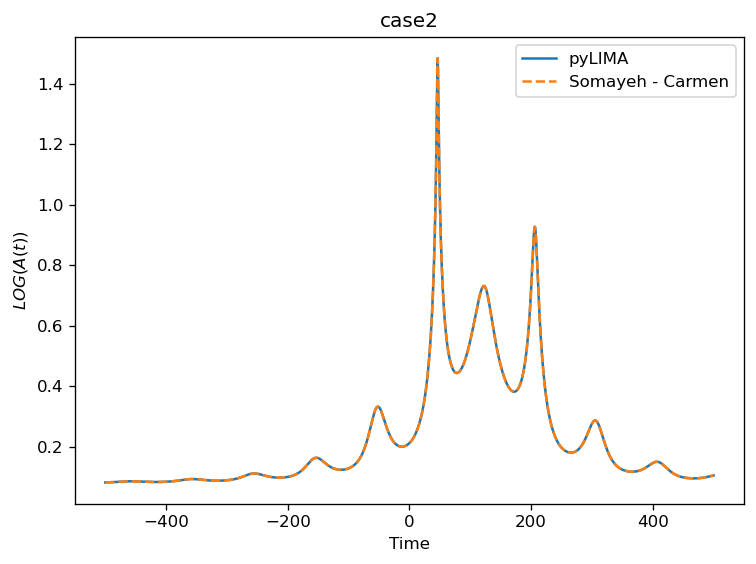

In [6]:
# ---- Event & telescope ----
simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

t = np.linspace(-500, 500, 5000)
lightcurve_sim = np.c_[t, np.full_like(t, 19.0), np.full_like(t, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth'
)
simulated_event.telescopes.append(tel)

case_name, df_row =  "case2", df_cases.loc["case2"]
params_list = [0]*12


xiE = df_row['xiE']
t_0 = df_row['t0']
t_E = df_row['tE']
P = df_row['P']
u_0 = df_row['u0']
phi_0 = df_row['xi_phase']
binary_flux_ratio = df_row['flux_ratio']
q = df_row['xi_mass_ratio']
fb = 0
fs=1
theta =0 
lambda_xi = df_row['xi_inclination']
omega = 2*np.pi/P
# for case_name, df_row in df_cases.iterrows():

params_list[0] = t_0#- df_row['xiE']*np.cos(df_row['xi_phase'])*df_row['tE'] 
params_list[1] = u_0# +df_row['xiE']*np.sin(df_row['xi_phase'])
params_list[2] = t_E 
params_list[3] = xiE*np.cos(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
params_list[4] = xiE*np.sin(theta) # <---- THE SOURCE BINARY SISTEM MOVES PARALLEL TO THE SEMI MAJOR AXIS
params_list[5] = omega
params_list[6] = phi_0   #< ---- Orbital phase at t0
params_list[7] = lambda_xi #pi/2
params_list[8] = q
params_list[9] = binary_flux_ratio
params_list[10] = fs 
params_list[11] = fb 

model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', df_row['t0']]) # <--- Here I set t0,xi = t0
model.define_model_parameters()

# plt.close("all")
# %matplotlib inline
py_params = model.compute_pyLIMA_parameters(params_list)
print("pyLIMA parameters", py_params)

A = model.model_magnification(model.event.telescopes[0], py_params)

plt.figure(dpi=120)
plt.title(case_name)
plt.plot(t, np.log10(A), label="pyLIMA")



def F(f_s, A, fb):
    F_t = f_s*A+fb
    return F_t
def A_u(u):
    A_t = (u**2 + 2)/(u*(u**2 + 4)**(.5))
    return A_t
    
def A_Binary_SC(t,t_0, u_0,t_E,xiE, omega, phi_0,lambda_xi, q , binary_flux_ratio,fs,fb):
    '''
    Somayeh and Carmen implementation
    t (1-d array): time
    t_0(float): time of closest approach
    phi_0 (float): phase
    q(float): mass_ratio
    P (float): period in days
    xiE(float): separation from the source to the barycenter in theta_E units
    binary_flux_ratio(float): binary flux ratio
    
    '''
    
    Omega =  omega*(t - t_0) + phi_0
    a1 =  q/(1+q)     # primary's orbital radius
    a2 =  -1/(1+q) 
    tau =  ((t-t_0)/t_E)
    
    delta_tau = xiE*(np.cos(Omega)-np.cos(phi_0))
    delta_beta = xiE*np.sin(lambda_xi)*(np.sin(Omega)-np.sin(phi_0))
    u1 = np.sqrt((u_0 + a1*delta_beta)**2 + (tau + a1*delta_tau)**2)
    
    m1 = q/(1+q)
    
    # This is the pyLIMA election:
    dx2 = -(1/(1+q))*np.cos(Omega) - (q/(1+q))*np.cos(phi_0)
    dy2 = -(1/(1+q))*np.sin(Omega) - (q/(1+q))*np.sin(phi_0)
    u2 = np.sqrt((u_0 + xiE*dy2)**2 + (tau + xiE*dx2)**2)
    # u2 = np.sqrt((u_0 + a2*delta_beta)**2 + (tau + a2*delta_tau)**2)  # This is the election of Miyazaki with symetry around the barycenter
    A1_binary = A_u(u1)
    A2_binary = A_u(u2)
    A_binary = A1_binary + binary_flux_ratio*A2_binary
    # F_binary1 = F(f_s, A_binary, fb)
    return A_binary 

A_binary = A_Binary_SC(t,t_0, u_0,t_E,xiE, omega, phi_0,lambda_xi, q , binary_flux_ratio,fs,fb)

plt.plot(t, np.log10(A_binary), linestyle='--', label='Somayeh - Carmen')
plt.xlabel("Time")
plt.ylabel(r"$LOG(A(t))$")
plt.legend()
plt.tight_layout()
plt.show()


# from bokeh.plotting import figure, show
    # from bokeh.layouts import row
    
    # # Plot Bokeh para A(t)
    # p1 = figure(width=600, height=400, title=case_name,
    #             x_axis_label="Time", y_axis_label="A(t)")
    # p1.line(time_sim, A, legend_label="DSPL")
    
    # # Plot Bokeh para geometría PyLIMA
    # fig_mpl, p2 = pyLIMA_plots.plot_geometry(model, params_list, bokeh_plot=True)
    
    # show(row(p1, p2))


In [ ]:

def pspl_magnification(u):
    """Magnification for a point source–point lens."""
    return (u**2 + 2.0) / (u * np.sqrt(u**2 + 4.0))

def manual_xallarap_DSPL_magnification(model, py_params, tel_name='Simulation'):
    """
    Reconstruct A(t) directly using:
    - xallarap_shifts
    - compute_xallarap_curvature
    and the PSPL formula for each source.
    """
    # --- 1) Time and basic parameters ---
    tel = [t for t in model.event.telescopes if t.name == tel_name][0]
    time = tel.lightcurve['time'].value

    t0  = py_params['t0']
    tE  = py_params['tE']
    u0  = py_params['u0']

    tau  = (time - t0) / tE
    beta = np.full_like(tau, u0, dtype=float)

    # --- 2) Xallarap model used by PyLIMA in this model ---
    # For a model created as PSPLmodel(..., double_source=['Circular', t0_xi])
    xallarap_model = (model.double_source_model[0], model.double_source_model[1])
    # typically ('Circular', t0_xi) and that t0_xi usually matches t0

    # --- 3) Normalized orbits of the two sources (in the S basis) ---
    # Returns:
    #   separation_1_1, separation_2_1  -> S1x(t), S1y(t) for source 1
    #   separation_1_2, separation_2_2  -> S2x(t), S2y(t) for source 2
    S1x, S1y, S2x, S2y = xallarap_shifts(xallarap_model, time, py_params, body='primary')

    # --- 4) Xallarap vector components (xi_para, xi_perp) ---
    xiE = np.array([py_params['xi_para'], py_params['xi_perp']], dtype=float)

    # To use compute_xallarap_curvature we need delta_positions as [d_N, d_E]
    # Here we interpret (Sx, Sy) as (N, E) in normalized Einstein units.
    S1 = np.vstack([S1x, S1y])
    S2 = np.vstack([S2x, S2y])

    # Displacements (delta_tau, delta_beta) for each source
    d_tau1, d_beta1 = compute_xallarap_curvature(xiE, S1)
    d_tau2, d_beta2 = compute_xallarap_curvature(xiE, S2)

    # --- 5) Full trajectories of each source in (tau, beta) ---
    tau1  = tau + d_tau1
    beta1 = beta + d_beta1

    tau2  = tau + d_tau2
    beta2 = beta + d_beta2

    # --- 6) Lens–source separation in Einstein units ---
    u1 = np.sqrt(tau1**2 + beta1**2)
    u2 = np.sqrt(tau2**2 + beta2**2)

    # --- 7) PSPL magnification for each source ---
    A1 = pspl_magnification(u1)
    A2 = pspl_magnification(u2)

    # --- 8) Combine the two sources using q_flux of the corresponding band ---
    # In your example: q_flux_G = 0.1 (flux of source 2 / flux of source 1).
    q_flux = py_params['q_flux_G']

    # If the baseline flux is F1 + F2, the effective magnification is:
    A = A1 + q_flux * A2

    return time, A

# Example of usage with your model and parameters:
time_manual, A_manual = manual_xallarap_DSPL_magnification(model, py_params)
A_pyLIMA = model.model_magnification(model.event.telescopes[0], py_params)

plt.xlabel("Time [days]")
plt.ylabel("A(t)")
plt.axvline(py_params["t0"])
plt.plot(time_manual, np.log10(A_manual), label='Manual xallarap DSPL')
plt.plot(time_sim, np.log10(A_pyLIMA), '--', label='PyLIMA model_magnification')
plt.legend(); plt.show()


In [ ]:
simulated_event = event.Event()
simulated_event.name = 'Simulated'
simulated_event.ra = 170
simulated_event.dec = -70

time_sim = np.linspace(-400,400, 500)
lightcurve_sim = np.c_[time_sim, np.full_like(time_sim, 19.0), np.full_like(time_sim, 0.01)]

tel = telescopes.Telescope(
    name='Simulation',
    camera_filter='G',
    lightcurve=lightcurve_sim.astype(float),
    lightcurve_names=['time','mag','err_mag'],
    lightcurve_units=['JD','mag','mag'],
    location='Earth')

simulated_event.telescopes.append(tel)


# for case_name, df_row in df_cases.iterrows():
    
case_name  = "case4-3b",
df_row = df_cases.loc[case_name]

params_list = [0]*12
delta_tref = 0
t_ref = 50 + delta_tref
params_list[0] = df_row['t0']
params_list[1] = df_row['u0']
params_list[2] = df_row['tE']
params_list[3] = df_row['xiE']*np.cos(np.pi/2)
params_list[4] = df_row['xiE']*np.sin(np.pi/2)
params_list[5] = 2*np.pi/df_row['P']
params_list[6] = df_row['xi_phase']
params_list[7] = df_row['xi_inclination']
params_list[8] = df_row['xi_mass_ratio']
params_list[9] = df_row['flux_ratio']
params_list[10] = 1 
params_list[11] = 1 

model = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0], double_source=['Circular', t_ref])
model.define_model_parameters()

py_params = model.compute_pyLIMA_parameters(params_list)
from pyLIMA.simulations import simulator
simulator.simulate_lightcurve(model, py_params)
print("pyLIMA parameters", py_params)

A = model.model_magnification(model.event.telescopes[0], py_params)

model2 = PSPL_model.PSPLmodel(simulated_event, parallax=['None', 0])
A2 = model2.model_magnification(model2.event.telescopes[0], model2.compute_pyLIMA_parameters(params_list[0:3]))

plt.plot(time_sim, A, label="DSPL")
plt.plot(time_sim, np.array(A2)+1, label="PSPL")

    

In [ ]:
# help(model2)
# help(model2.sources_trajectory)

In [ ]:
# model2.event.telescopes[0].lightcurve

In [ ]:
positions= model.sources_trajectory(model.event.telescopes[0], model.compute_pyLIMA_parameters(params_list),data_type="photometry")
plt.plot(positions[2],positions[3])
plt.plot(positions[0],positions[1])

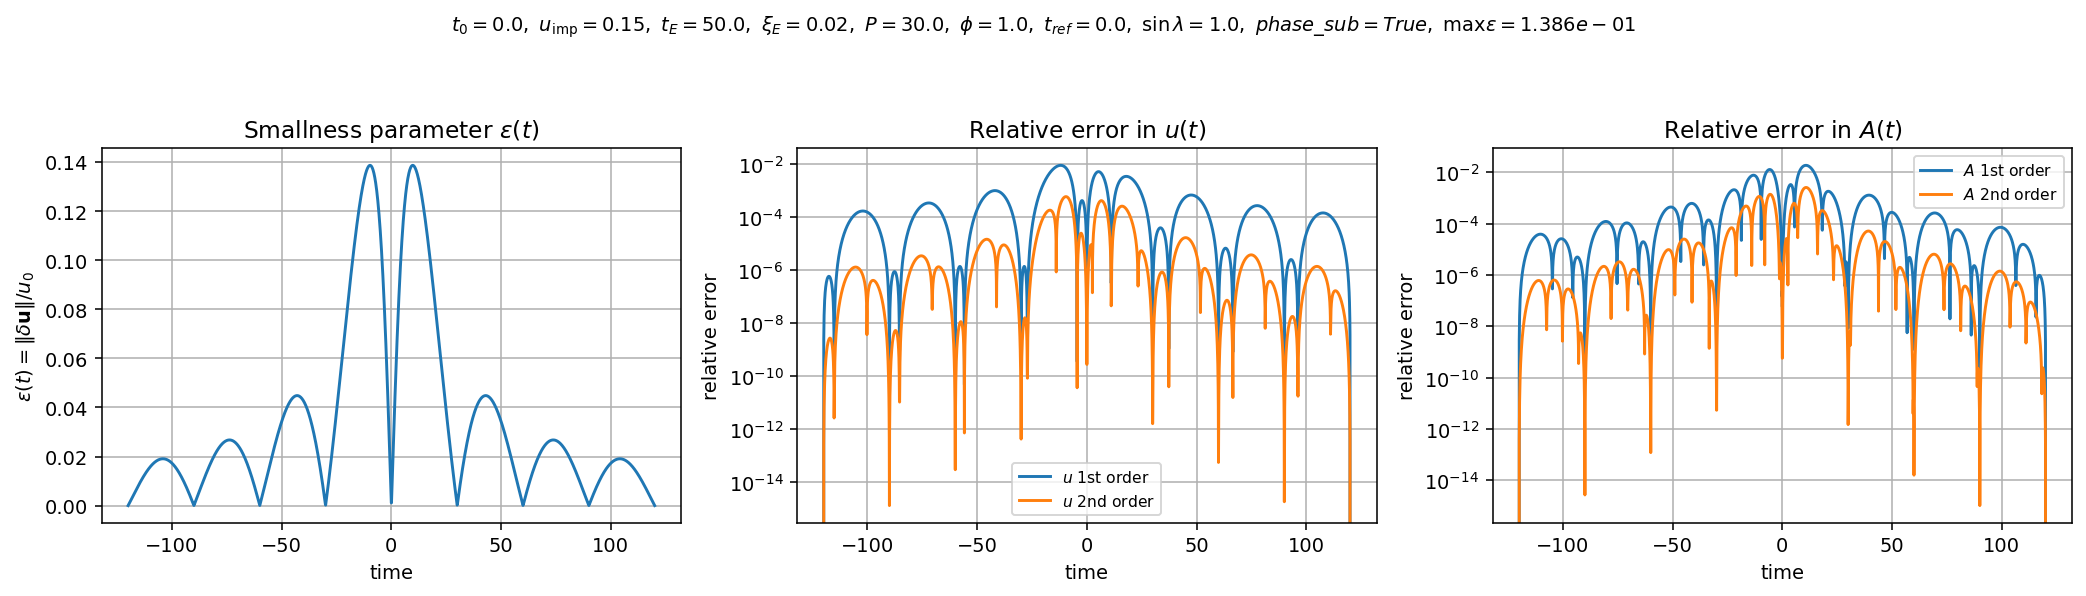

max epsilon(t) = 0.13863068203491663
max rel error u 1st order  = 0.008817571440741497
max rel error u 2nd order  = 0.0005790579642938526
max rel error A 1st order  = 0.01851270069607528
max rel error A 2nd order  = 0.002540070469918344


In [38]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# 0) Parámetros (editables)
# ============================================================
t0 = 0.0
u_imp = 0.15          # IMPACT PARAMETER (para evitar el abuso de notación con |u|)
tE = 50.0

# Xallarap toy (solo para testear la expansión)
xiE = 0.02            # probá 1e-4..1e-1 para ver cuándo rompe
P = 30.0
omega = 2*np.pi/P
phi = 1.0
t_ref = 0.0
sin_lambda = 1.0
phase_subtraction = True

t = np.linspace(-120, 120, 3000)

# ============================================================
# 1) Definiciones exactas
# ============================================================
def A_of_u(u):
    return (u*u + 2.0) / (u * np.sqrt(u*u + 4.0))

def rectilinear_uvec(t, t0, u_imp, tE):
    tau = (t - t0) / tE
    beta = np.full_like(tau, u_imp, dtype=float)
    return np.array([tau, beta])  # shape (2, N)

def xallarap_deltas(t, omega, phi, t_ref, xiE, sin_lambda=1.0, phase_subtraction=True):
    Omega = omega*(t - t_ref) + phi
    if phase_subtraction:
        d_tau = xiE*(np.cos(Omega) - np.cos(phi))
        d_beta = xiE*sin_lambda*(np.sin(Omega) - np.sin(phi))
    else:
        d_tau = xiE*np.cos(Omega)
        d_beta = xiE*sin_lambda*np.sin(Omega)
    return np.array([d_tau, d_beta])  # shape (2, N)

u0_vec = rectilinear_uvec(t, t0, u_imp, tE)
du_vec = xallarap_deltas(t, omega, phi, t_ref, xiE, sin_lambda, phase_subtraction)

u_vec_exact = u0_vec + du_vec
u0 = np.linalg.norm(u0_vec, axis=0)
u_exact = np.linalg.norm(u_vec_exact, axis=0)

A0 = A_of_u(u0)
A_exact = A_of_u(u_exact)

# ============================================================
# 2) Expansión de u = |u0 + du| hasta orden 2 en du
#
# Sea:
#   u = sqrt( (u0_vec + du_vec)·(u0_vec + du_vec) )
#     = sqrt( u0^2 + 2 u0_vec·du_vec + du^2 )
#
# Definimos:
#   s = u0_vec·du_vec
#   q = du_vec·du_vec
#
# Entonces (Taylor en du):
#   u ≈ u0 + s/u0  +  ( q/(2u0) - s^2/(2u0^3) )
# ============================================================
s = np.sum(u0_vec * du_vec, axis=0)          # u0_vec·du_vec
q = np.sum(du_vec * du_vec, axis=0)          # du_vec·du_vec

du_1 = s / u0
du_2 = (q/(2*u0)) - (s*s/(2*u0**3))

u_lin = u0 + du_1
u_quad = u0 + du_1 + du_2

# ============================================================
# 3) Expansión de A(u) alrededor de u0 usando du (escalar)
#
#   A(u0 + Δu) ≈ A(u0) + A'(u0) Δu + 1/2 A''(u0) (Δu)^2
#
# donde Δu = du_1 (orden 1) o du_1+du_2 (hasta orden 2).
# ============================================================
def Aprime(u):
    # derivada exacta de A(u) = (u^2+2)/(u sqrt(u^2+4))
    # simplificación algebraica:
    # A'(u) = -8 / (u^2 (u^2+4)^(3/2))
    return -8.0 / (u*u * (u*u + 4.0)**1.5)

def Asecond(u):
    # segunda derivada exacta:
    # A''(u) = 8*(5u^2 + 8) / (u^3 (u^2+4)^(5/2))
    return 8.0*(5.0*u*u + 8.0) / (u**3 * (u*u + 4.0)**2.5)

Ap0 = Aprime(u0)
App0 = Asecond(u0)

A_lin = A0 + Ap0 * du_1
A_quad = A0 + Ap0 * (du_1 + du_2) + 0.5 * App0 * (du_1**2)

# ============================================================
# 4) Métrica de pequeñez: epsilon(t) = ||du_vec||/u0
# ============================================================
epsilon = np.linalg.norm(du_vec, axis=0) / u0
eps_max = np.max(epsilon)

# ============================================================
# 5) Errores relativos (evito divisiones por ~0)
# ============================================================
def rel_err(x_approx, x_exact, floor=1e-15):
    denom = np.maximum(np.abs(x_exact), floor)
    return np.abs(x_approx - x_exact) / denom

err_u_lin = rel_err(u_lin, u_exact)
err_u_quad = rel_err(u_quad, u_exact)

err_A_lin = rel_err(A_lin, A_exact)
err_A_quad = rel_err(A_quad, A_exact)

# ============================================================
# 6) Plots: (i) epsilon(t), (ii) error en u(t), (iii) error en A(t)
# ============================================================
fig, axs = plt.subplots(1, 3, figsize=(15, 4.3), dpi=140)

axs[0].plot(t, epsilon)
axs[0].set_xlabel("time")
axs[0].set_ylabel(r"$\epsilon(t)=\|\delta\mathbf{u}\|/u_0$")
axs[0].set_title(r"Smallness parameter $\epsilon(t)$")
axs[0].grid(True)

axs[1].plot(t, err_u_lin, label=r"$u$ 1st order")
axs[1].plot(t, err_u_quad, label=r"$u$ 2nd order")
axs[1].set_yscale("log")
axs[1].set_xlabel("time")
axs[1].set_ylabel("relative error")
axs[1].set_title(r"Relative error in $u(t)$")
axs[1].grid(True)
axs[1].legend(fontsize=8)

axs[2].plot(t, err_A_lin, label=r"$A$ 1st order")
axs[2].plot(t, err_A_quad, label=r"$A$ 2nd order")
axs[2].set_yscale("log")
axs[2].set_xlabel("time")
axs[2].set_ylabel("relative error")
axs[2].set_title(r"Relative error in $A(t)$")
axs[2].grid(True)
axs[2].legend(fontsize=8)

fig.suptitle(
    rf"$t_0={t0},\ u_{{\rm imp}}={u_imp},\ t_E={tE},\ \xi_E={xiE},\ P={P},\ "
    rf"\phi={phi},\ t_{{ref}}={t_ref},\ \sin\lambda={sin_lambda},\ "
    rf"phase\_sub={phase_subtraction},\ \max\epsilon={eps_max:.3e}$",
    fontsize=10
)

plt.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()

print("max epsilon(t) =", eps_max)
print("max rel error u 1st order  =", np.max(err_u_lin))
print("max rel error u 2nd order  =", np.max(err_u_quad))
print("max rel error A 1st order  =", np.max(err_A_lin))
print("max rel error A 2nd order  =", np.max(err_A_quad))


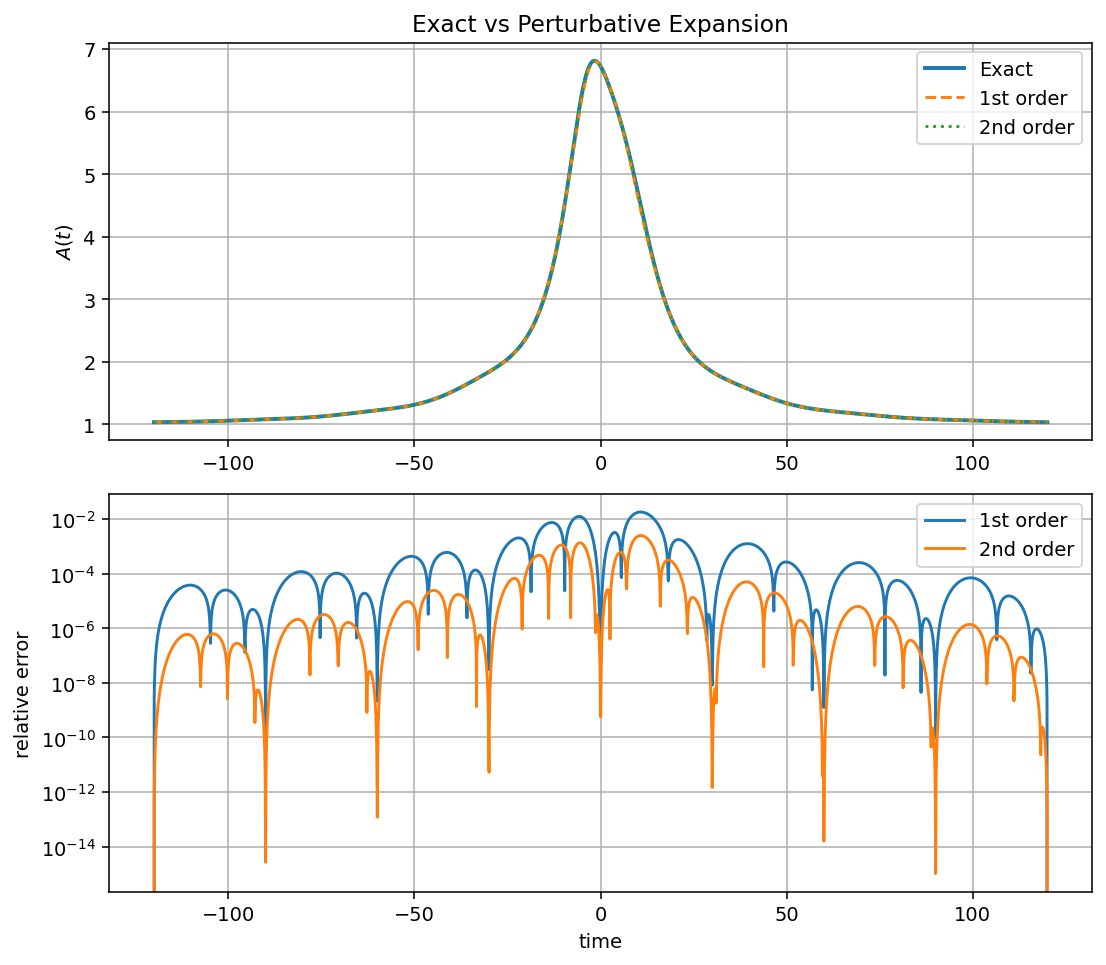

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Parámetros
# ============================================================
t0 = 0.0
u_imp = 0.15
tE = 50.0

xiE = 0.02
P = 30.0
omega = 2*np.pi/P
phi = 1.0
t_ref = 0.0
sin_lambda = 1.0
phase_subtraction = True

t = np.linspace(-120, 120, 3000)

# ============================================================
# Definiciones
# ============================================================
def A_of_u(u):
    return (u*u + 2.0) / (u * np.sqrt(u*u + 4.0))

def Aprime(u):
    return -8.0 / (u*u * (u*u + 4.0)**1.5)

def Asecond(u):
    return 8.0*(5.0*u*u + 8.0) / (u**3 * (u*u + 4.0)**2.5)

def rect_uvec(t):
    tau = (t - t0)/tE
    beta = np.full_like(tau, u_imp)
    return np.array([tau, beta])

def xallarap_duvec(t):
    Omega = omega*(t - t_ref) + phi
    if phase_subtraction:
        d_tau = xiE*(np.cos(Omega) - np.cos(phi))
        d_beta = xiE*sin_lambda*(np.sin(Omega) - np.sin(phi))
    else:
        d_tau = xiE*np.cos(Omega)
        d_beta = xiE*sin_lambda*np.sin(Omega)
    return np.array([d_tau, d_beta])

# ============================================================
# Exacto
# ============================================================
u0_vec = rect_uvec(t)
du_vec = xallarap_duvec(t)

u0 = np.linalg.norm(u0_vec, axis=0)
u_exact = np.linalg.norm(u0_vec + du_vec, axis=0)

A0 = A_of_u(u0)
A_exact = A_of_u(u_exact)

# ============================================================
# Expansión de u
# ============================================================
s = np.sum(u0_vec * du_vec, axis=0)
q = np.sum(du_vec * du_vec, axis=0)

du_1 = s / u0
du_2 = (q/(2*u0)) - (s*s/(2*u0**3))

u_lin = u0 + du_1
u_quad = u0 + du_1 + du_2

# ============================================================
# Expansión de A
# ============================================================
Ap0 = Aprime(u0)
App0 = Asecond(u0)

A_lin = A0 + Ap0 * du_1
A_quad = A0 + Ap0*(du_1 + du_2) + 0.5*App0*(du_1**2)

# ============================================================
# Plot
# ============================================================
fig, axs = plt.subplots(2, 1, figsize=(8, 7), dpi=140)

# ---- Curvas de luz
axs[0].plot(t, A_exact, label="Exact", linewidth=2)
axs[0].plot(t, A_lin, "--", label="1st order")
axs[0].plot(t, A_quad, ":", label="2nd order")

axs[0].set_ylabel(r"$A(t)$")
axs[0].set_title("Exact vs Perturbative Expansion")
axs[0].grid(True)
axs[0].legend()

# ---- Error relativo
err_lin = np.abs(A_lin - A_exact)/A_exact
err_quad = np.abs(A_quad - A_exact)/A_exact

axs[1].plot(t, err_lin, label="1st order")
axs[1].plot(t, err_quad, label="2nd order")

axs[1].set_yscale("log")
axs[1].set_xlabel("time")
axs[1].set_ylabel("relative error")
axs[1].grid(True)
axs[1].legend()

plt.tight_layout()
plt.show()


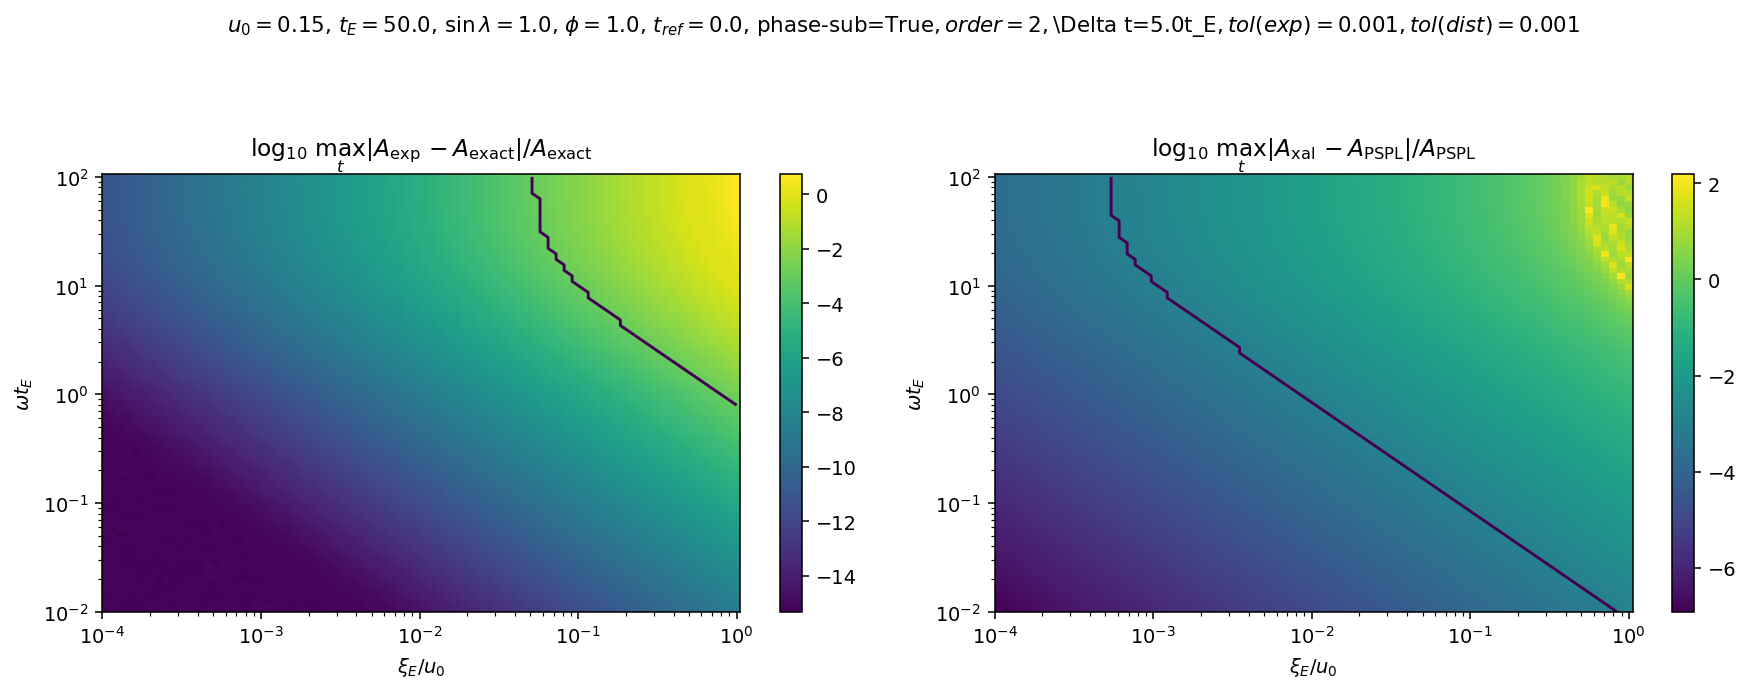

Fracción de grilla con expansión válida y xallarap distinguible: 0.378


In [40]:
import numpy as np
import matplotlib.pyplot as plt

# ============================================================
# Core microlensing pieces
# ============================================================
def A_of_u(u):
    return (u*u + 2.0) / (u * np.sqrt(u*u + 4.0))

def Aprime(u):
    # dA/du
    return -8.0 / (u*u * (u*u + 4.0)**1.5)

def Asecond(u):
    # d^2A/du^2
    return 8.0*(5.0*u*u + 8.0) / (u**3 * (u*u + 4.0)**2.5)

def rect_uvec(t, t0, u0, tE):
    tau = (t - t0)/tE
    beta = np.full_like(tau, u0, dtype=float)
    return np.array([tau, beta])

def xallarap_duvec(t, omega, phi, t_ref, xiE, sin_lambda=1.0, phase_subtraction=True):
    Omega = omega*(t - t_ref) + phi
    if phase_subtraction:
        d_tau  = xiE*(np.cos(Omega) - np.cos(phi))
        d_beta = xiE*sin_lambda*(np.sin(Omega) - np.sin(phi))
    else:
        d_tau  = xiE*np.cos(Omega)
        d_beta = xiE*sin_lambda*np.sin(Omega)
    return np.array([d_tau, d_beta])

def expansion_A(t, t0, u0, tE, omega, phi, t_ref, xiE, sin_lambda=1.0,
                phase_subtraction=True, order=2):
    """
    Devuelve A_exact(t), A_exp(t) (orden 1 o 2), A_pspl(t).
    La expansión está hecha en el escalar u = ||u_vec|| alrededor de u0(t)=||u_rect(t)||.
    """
    u0_vec = rect_uvec(t, t0, u0, tE)
    du_vec = xallarap_duvec(t, omega, phi, t_ref, xiE, sin_lambda, phase_subtraction)

    u0_mod = np.linalg.norm(u0_vec, axis=0)
    u_exact = np.linalg.norm(u0_vec + du_vec, axis=0)

    A_pspl  = A_of_u(u0_mod)
    A_exact = A_of_u(u_exact)

    # Expansión de u = ||u0 + du|| = u0 + Δu1 + Δu2 + ...
    s = np.sum(u0_vec * du_vec, axis=0)         # u0·du
    q = np.sum(du_vec * du_vec, axis=0)         # du·du

    du_1 = s / u0_mod
    du_2 = (q/(2*u0_mod)) - (s*s/(2*u0_mod**3))

    if order == 1:
        du_use = du_1
    elif order == 2:
        du_use = du_1 + du_2
    else:
        raise ValueError("order must be 1 or 2")

    # Expansión de A(u) alrededor de u0_mod
    A0 = A_pspl
    Ap0  = Aprime(u0_mod)

    if order == 1:
        A_exp = A0 + Ap0 * du_use
    else:
        App0 = Asecond(u0_mod)
        # Nota: consistente a O(du^2): incluye du_2 en el término lineal y du_1^2 en el cuadrático
        A_exp = A0 + Ap0*(du_1 + du_2) + 0.5*App0*(du_1**2)

    return A_exact, A_exp, A_pspl

# ============================================================
# Sweep (parameter scan)
# ============================================================
def scan_grid(
    u0=0.15, tE=50.0,
    sin_lambda=1.0,
    phi=1.0,
    t0=0.0,
    t_ref=0.0,
    phase_subtraction=True,
    order=2,
    # grid ranges
    xiE_over_u0_grid=None,
    omega_tE_grid=None,
    # time window for comparison (in units of tE)
    window_tE=5.0,
    # thresholds (tune)
    expansion_tol=1e-3,      # "expansion valid" if max rel error < tol
    distinguish_tol=1e-3     # "distinguishable" if max rel diff from PSPL > tol
):
    if xiE_over_u0_grid is None:
        xiE_over_u0_grid = np.logspace(-4, 0, 70)   # 1e-4 ... 1
    if omega_tE_grid is None:
        omega_tE_grid = np.logspace(-2, 2, 70)      # 1e-2 ... 1e2

    # time axis for evaluation
    t = np.linspace(t0 - window_tE*tE, t0 + window_tE*tE, 4000)

    # outputs
    max_rel_err_exp = np.zeros((len(omega_tE_grid), len(xiE_over_u0_grid)))
    max_rel_diff_pspl = np.zeros_like(max_rel_err_exp)

    for i, omega_tE in enumerate(omega_tE_grid):
        omega = omega_tE / tE
        for j, xiE_over_u0 in enumerate(xiE_over_u0_grid):
            xiE = xiE_over_u0 * u0

            A_exact, A_exp, A_pspl = expansion_A(
                t, t0, u0, tE, omega, phi, t_ref, xiE, sin_lambda,
                phase_subtraction=phase_subtraction, order=order
            )

            # métrica 1: error relativo expansión vs exacto
            rel_err = np.abs(A_exp - A_exact) / np.maximum(np.abs(A_exact), 1e-300)
            max_rel_err_exp[i, j] = np.max(rel_err)

            # métrica 2: diferencia relativa exacto vs PSPL
            rel_diff = np.abs(A_exact - A_pspl) / np.maximum(np.abs(A_pspl), 1e-300)
            max_rel_diff_pspl[i, j] = np.max(rel_diff)

    # máscaras booleanas útiles
    expansion_valid = (max_rel_err_exp < expansion_tol)
    distinguishable = (max_rel_diff_pspl > distinguish_tol)

    return xiE_over_u0_grid, omega_tE_grid, max_rel_err_exp, max_rel_diff_pspl, expansion_valid, distinguishable

# ============================================================
# Run + plot
# ============================================================
if __name__ == "__main__":
    # ----- knobs
    u0 = 0.15
    tE = 50.0
    sin_lambda = 1.0
    phi = 1.0
    t0 = 0.0
    t_ref = 0.0
    phase_subtraction = True
    order = 2

    expansion_tol = 1e-3
    distinguish_tol = 1e-3
    window_tE = 5.0

    xiE_over_u0_grid = np.logspace(-4, 0, 80)
    omega_tE_grid    = np.logspace(-2, 2, 80)

    (xeu, otE, err_exp, diff_pspl,
     mask_exp_ok, mask_dist) = scan_grid(
        u0=u0, tE=tE,
        sin_lambda=sin_lambda, phi=phi,
        t0=t0, t_ref=t_ref,
        phase_subtraction=phase_subtraction,
        order=order,
        xiE_over_u0_grid=xiE_over_u0_grid,
        omega_tE_grid=omega_tE_grid,
        window_tE=window_tE,
        expansion_tol=expansion_tol,
        distinguish_tol=distinguish_tol
    )

    # ----- heatmaps (log10)
    X, Y = np.meshgrid(xeu, otE)

    fig, axs = plt.subplots(1, 2, figsize=(13, 5), dpi=140)

    im0 = axs[0].pcolormesh(X, Y, np.log10(err_exp), shading="auto")
    axs[0].set_xscale("log"); axs[0].set_yscale("log")
    axs[0].set_xlabel(r"$\xi_E/u_0$")
    axs[0].set_ylabel(r"$\omega t_E$")
    axs[0].set_title(r"$\log_{10}\,\max_t |A_{\rm exp}-A_{\rm exact}|/A_{\rm exact}$")
    fig.colorbar(im0, ax=axs[0])

    # contorno de "validez" de expansión
    axs[0].contour(X, Y, mask_exp_ok.astype(float), levels=[0.5])

    im1 = axs[1].pcolormesh(X, Y, np.log10(diff_pspl), shading="auto")
    axs[1].set_xscale("log"); axs[1].set_yscale("log")
    axs[1].set_xlabel(r"$\xi_E/u_0$")
    axs[1].set_ylabel(r"$\omega t_E$")
    axs[1].set_title(r"$\log_{10}\,\max_t |A_{\rm xal}-A_{\rm PSPL}|/A_{\rm PSPL}$")
    fig.colorbar(im1, ax=axs[1])

    # contorno de "distinguible"
    axs[1].contour(X, Y, mask_dist.astype(float), levels=[0.5])

    fig.suptitle(
        rf"$u_0={u0}$, $t_E={tE}$, $\sin\lambda={sin_lambda}$, "
        rf"$\phi={phi}$, $t_{{ref}}={t_ref}$, "
        rf"phase-sub={phase_subtraction}$, order={order}, "
        rf"$\Delta t={window_tE}t_E$, "
        rf"tol(exp)={expansion_tol}, tol(dist)={distinguish_tol}$",
        fontsize=11
    )

    plt.tight_layout(rect=[0, 0, 1, 0.90])
    plt.show()

    # ----- (opcional) región “interesante”: expansión válida PERO distinguible de PSPL
    # Eso te da "xallarap detectable" manteniendo consistencia perturbativa.
    interesting = mask_exp_ok & mask_dist
    if np.any(interesting):
        frac = np.sum(interesting) / interesting.size
        print(f"Fracción de grilla con expansión válida y xallarap distinguible: {frac:.3f}")


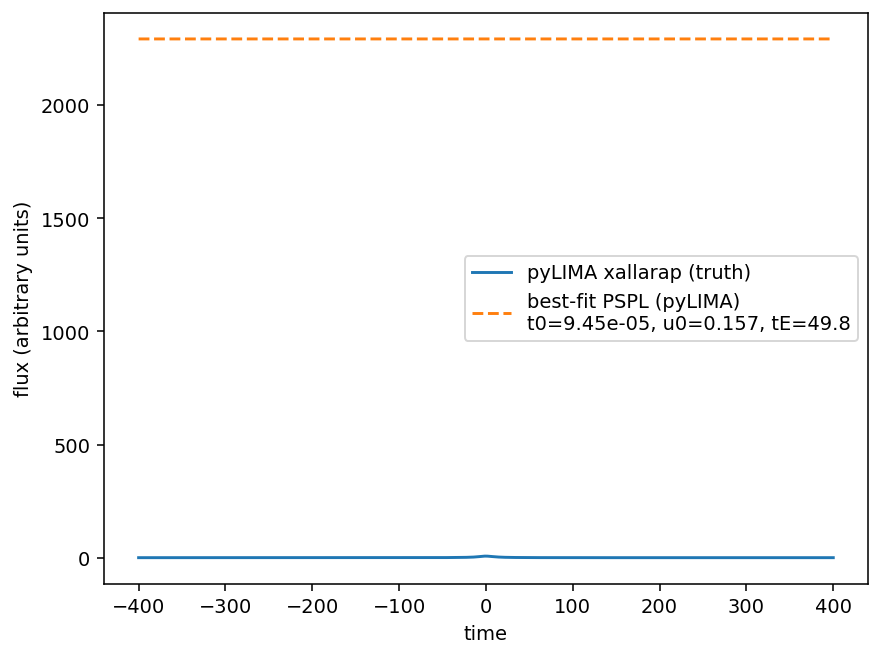

Fit status: Maximum number of function evaluations has been exceeded.
Chi2: 7861769974935749.0


In [42]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize

from pyLIMA.models import PSPL_model
from pyLIMA import event, telescopes

def build_sim_event(time, mag0=19.0, emag=0.01, filt="G"):
    ev = event.Event()
    ev.name = "Simulated"
    ev.ra = 170
    ev.dec = -70

    lightcurve_sim = np.c_[time, np.full_like(time, mag0), np.full_like(time, emag)]
    tel = telescopes.Telescope(
        name="Simulation",
        camera_filter=filt,
        lightcurve=lightcurve_sim.astype(float),
        lightcurve_names=["time", "mag", "err_mag"],
        lightcurve_units=["JD", "mag", "mag"],
        location="Earth",
    )
    ev.telescopes.append(tel)
    return ev

def simulate_xallarap_with_pyLIMA(ev, params_list, t_ref):
    """
    params_list must match the model dictionary for PSPL + Circular double source.
    We assume you already arranged it as you did before:
    [t0,u0,tE, xi_para,xi_perp, xi_angular_velocity, xi_phase, xi_inclination,
     xi_mass_ratio, q_flux_G, fsource, ftotal]  (example ordering)
    """
    model_xal = PSPL_model.PSPLmodel(ev, parallax=["None", 0.0], double_source=["Circular", t_ref])
    model_xal.define_model_parameters()
    py_params = model_xal.compute_pyLIMA_parameters(params_list)

    A = model_xal.model_magnification(ev.telescopes[0], py_params)
    # For a noise-free theoretical study you can treat "flux" = A (set fsource=1,fblend=0)
    # but to stay consistent with pyLIMA flux handling:
    model_flux = model_xal.compute_the_microlensing_model(ev.telescopes[0], py_params)["photometry"]
    return A, model_flux, py_params

def fit_PSPL_to_flux_with_pyLIMA(ev, flux_target, err_flux=None,
                                t0_init=0.0, u0_init=0.1, tE_init=50.0,
                                bounds=((None, None), (1e-6, None), (1e-6, None))):
    """
    Fit a pure PSPL model (no double source) using pyLIMA as forward model,
    optimizing only (t0,u0,tE). Flux parameters are handled by pyLIMA via derive_telescope_flux
    when computing the photometric model.
    """
    tel = ev.telescopes[0]

    # Ensure the telescope lightcurve has flux columns pyLIMA expects.
    # If your Telescope only had mag/err_mag, pyLIMA internally converts to flux in many pipelines,
    # but to be robust we attach flux here:
    # We'll build a minimal structured array compatible with the telescope object expectations.
    # If your pyLIMA already has flux in telescope.lightcurve, skip this block.
    if "flux" not in tel.lightcurve.dtype.names:
        # crude mag->flux conversion is arbitrary without ZP; for fitting relative shapes,
        # we can store flux_target directly.
        # We'll create a new array with flux and err_flux:
        time = tel.lightcurve["time"].astype(float)
        if err_flux is None:
            err_flux = np.full_like(time, 1e-3, dtype=float)
        new = np.zeros(len(time), dtype=[("time", float), ("flux", float), ("err_flux", float)])
        new["time"] = time
        new["flux"] = flux_target
        new["err_flux"] = err_flux
        tel.lightcurve = new

    model_pspl = PSPL_model.PSPLmodel(ev, parallax=["None", 0.0], double_source=["None", 0.0])
    model_pspl.define_model_parameters()

    time = tel.lightcurve["time"]
    if err_flux is None:
        err_flux = tel.lightcurve["err_flux"]

    def chi2(x):
        t0, u0, tE = x
        # Build parameter vector for this model (it will also include flux parameters; set None -> derived)
        # We'll create a list aligned with model_pspl.model_dictionnary keys.
        # The simplest: start from a full list of Nones, then set t0,u0,tE positions.
        keys = list(model_pspl.model_dictionnary.keys())
        p = [None]*len(keys)
        p[keys.index("t0")] = t0
        p[keys.index("u0")] = u0
        p[keys.index("tE")] = tE

        py_params = model_pspl.compute_pyLIMA_parameters(p)
        phot = model_pspl.compute_the_microlensing_model(tel, py_params)["photometry"]
        r = (phot - flux_target)/err_flux
        return np.sum(r*r)

    x0 = np.array([t0_init, u0_init, tE_init], dtype=float)
    res = minimize(chi2, x0, method="Nelder-Mead")  # robust, no gradients
    t0_fit, u0_fit, tE_fit = res.x
    return (t0_fit, u0_fit, tE_fit, res)

# -------------------------
# Example: run everything
# -------------------------
t = np.linspace(-400, 400, 1500)
ev = build_sim_event(t)

# Example params_list (replace with your df_row mapping)
# IMPORTANT: this ordering must match what your model_xal.model_dictionnary expects in YOUR pyLIMA version.
# The safe way is: print(model_xal.model_dictionnary) and fill accordingly.
params_list = [0]*12
params_list[0] = 0.0        # t0
params_list[1] = 0.15       # u0
params_list[2] = 50.0       # tE
params_list[3] = 0.01       # xi_para
params_list[4] = 0.00       # xi_perp
params_list[5] = 2*np.pi/30 # xi_angular_velocity
params_list[6] = 1.0        # xi_phase
params_list[7] = np.pi/2    # xi_inclination
params_list[8] = 10.0       # xi_mass_ratio
params_list[9] = 0.2        # q_flux_G
params_list[10] = 1.0       # fsource
params_list[11] = 1.0       # ftotal (so fblend=0)

t_ref = 0.0

A_xal, flux_xal, py_params_xal = simulate_xallarap_with_pyLIMA(ev, params_list, t_ref)

# Fit pure PSPL to the xallarap-generated flux
t0_fit, u0_fit, tE_fit, res = fit_PSPL_to_flux_with_pyLIMA(
    ev, flux_target=flux_xal, err_flux=np.full_like(t, 1e-3),
    t0_init=params_list[0], u0_init=params_list[1], tE_init=params_list[2]
)

# Build the best-fit PSPL curve (again using pyLIMA)
model_pspl = PSPL_model.PSPLmodel(ev, parallax=["None", 0.0], double_source=["None", 0.0])
model_pspl.define_model_parameters()
keys = list(model_pspl.model_dictionnary.keys())
p = [None]*len(keys)
p[keys.index("t0")] = t0_fit
p[keys.index("u0")] = u0_fit
p[keys.index("tE")] = tE_fit
py_params_fit = model_pspl.compute_pyLIMA_parameters(p)
flux_fit = model_pspl.compute_the_microlensing_model(ev.telescopes[0], py_params_fit)["photometry"]

# Plot
plt.figure(dpi=140)
plt.plot(t, flux_xal, label="pyLIMA xallarap (truth)")
plt.plot(t, flux_fit, "--", label=f"best-fit PSPL (pyLIMA)\n"
                                  f"t0={t0_fit:.3g}, u0={u0_fit:.3g}, tE={tE_fit:.3g}")
plt.xlabel("time")
plt.ylabel("flux (arbitrary units)")
plt.legend()
plt.tight_layout()
plt.show()

print("Fit status:", res.message)
print("Chi2:", res.fun)
